In [3]:
import pandas as pd
import numpy as np
import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
from keras.layers import Dropout
from sklearn.metrics import classification_report, accuracy_score

In [19]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
gasturbine= pd.read_csv(r'C:\Users\vikra\OneDrive\Desktop\Data scince assignment\Assignment\neural network\gas_turbines.csv')
gasturbine.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [5]:
first_column = gasturbine.pop('TEY')
gasturbine.insert(0, 'TEY', first_column)
gasturbine.head()

,TEY,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,114.70,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,114.72,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,114.71,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,114.72,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,114.72,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311


In [6]:
gasturbine.shape

(15039, 11)

In [7]:
gasturbine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TEY     15039 non-null  float64
 1   AT      15039 non-null  float64
 2   AP      15039 non-null  float64
 3   AH      15039 non-null  float64
 4   AFDP    15039 non-null  float64
 5   GTEP    15039 non-null  float64
 6   TIT     15039 non-null  float64
 7   TAT     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [8]:
gasturbine.isnull().sum()

TEY     0
AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
CDP     0
CO      0
NOX     0
dtype: int64

In [9]:
gasturbine.corr()

,TEY,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
TEY,1.000000,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,0.988473,-0.541751,-0.102631
AT,-0.207495,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.100705,-0.088588,-0.600006
AP,0.146939,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.131198,0.041614,0.256744
AH,-0.110272,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.182010,0.165505,0.143061
AFDP,0.717995,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.727152,-0.334207,-0.037299
GTEP,0.977042,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.993784,-0.508259,-0.208496
TIT,0.891587,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.887238,-0.688272,-0.231636
TAT,-0.720356,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.744740,0.063404,0.009888
CDP,0.988473,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,1.000000,-0.520783,-0.169103
CO,-0.541751,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.520783,1.000000,0.316743


In [10]:
import matplotlib.pyplot as plt

In [11]:
import seaborn as sns

<AxesSubplot:>

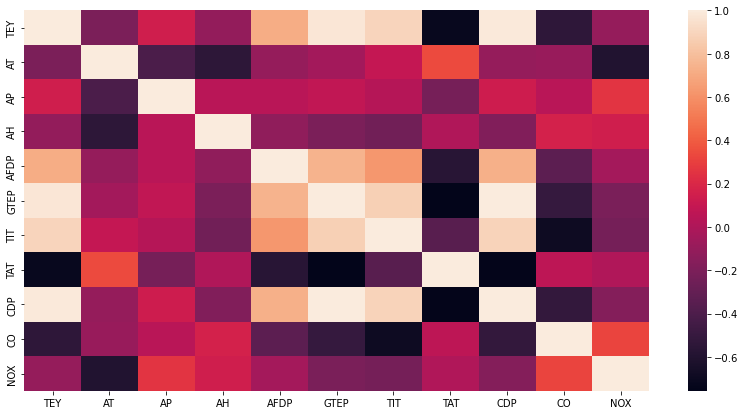

In [12]:
plt.subplots(figsize=(14,7))
sns.heatmap(gasturbine.corr())

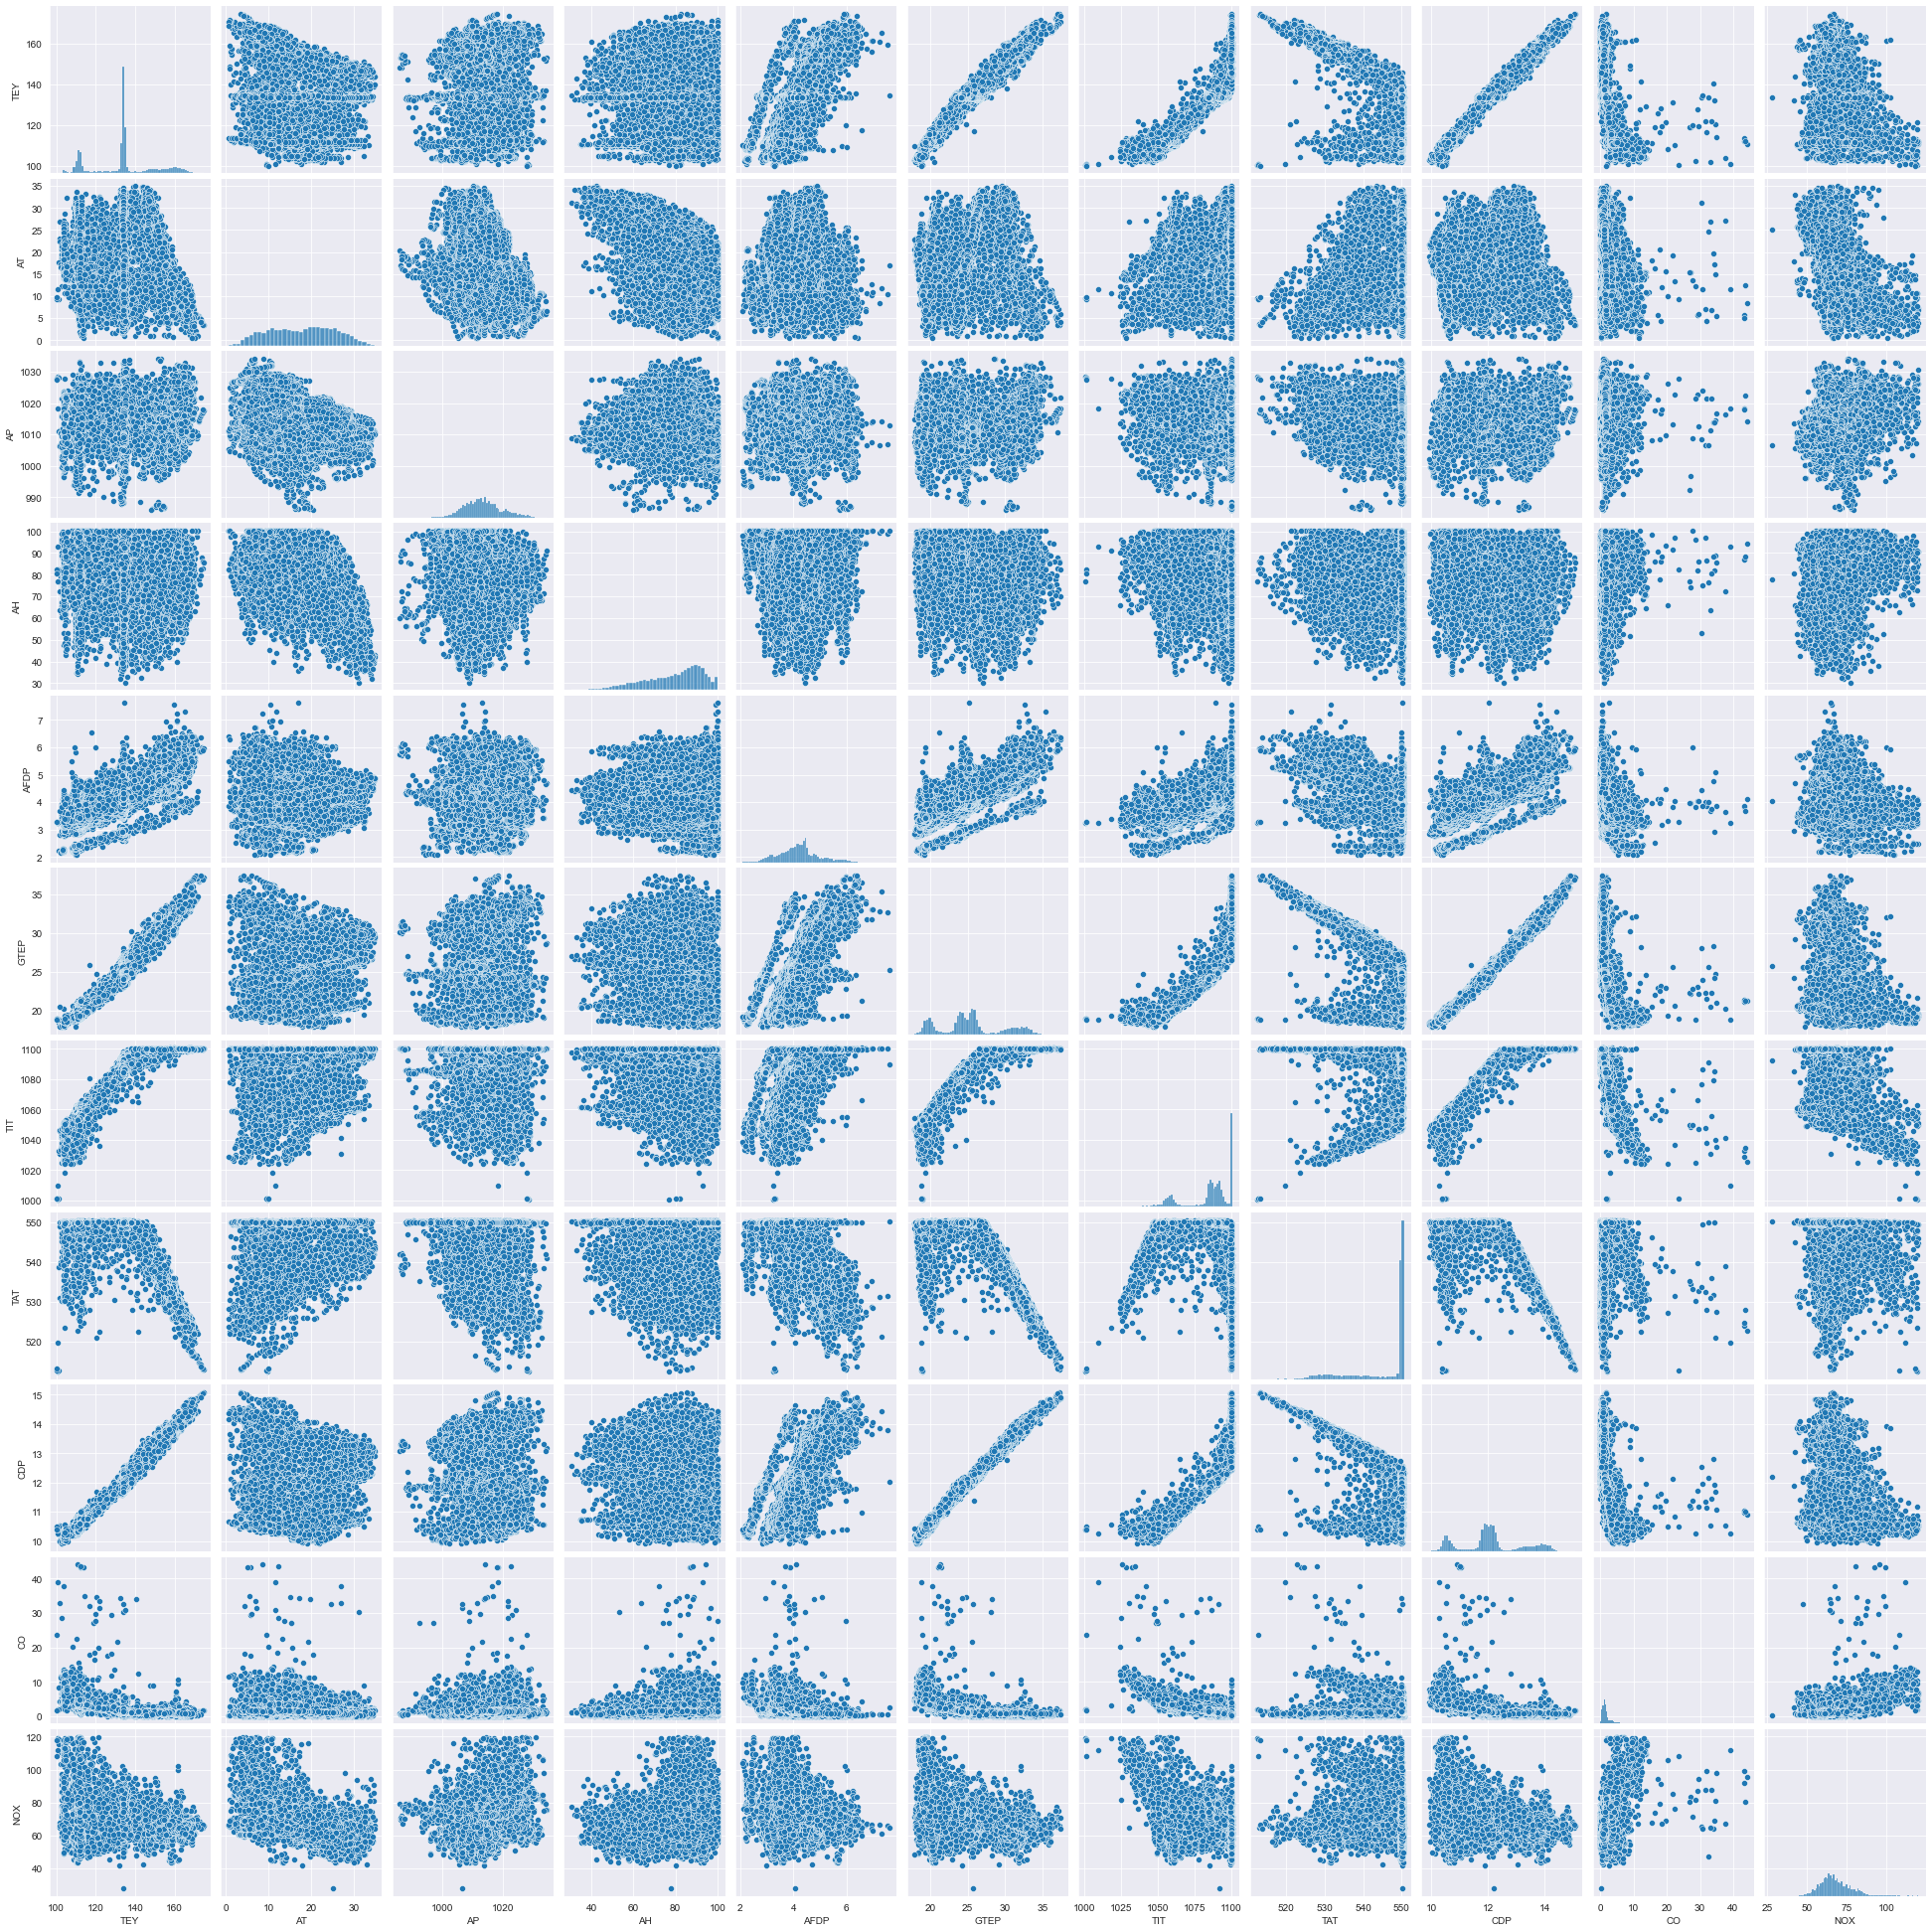

In [34]:
sns.set_style('darkgrid')
sns.pairplot(gasturbine)

plt.show()

<AxesSubplot:>

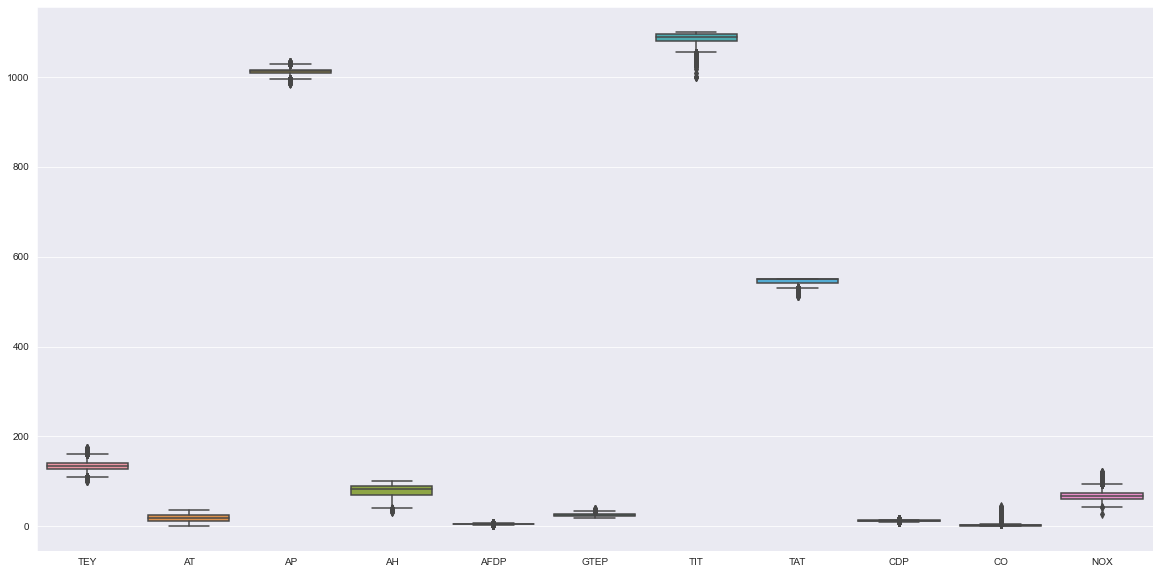

In [36]:
plt.figure(figsize=(20,10))
sns.boxplot(data = gasturbine)

<AxesSubplot:>

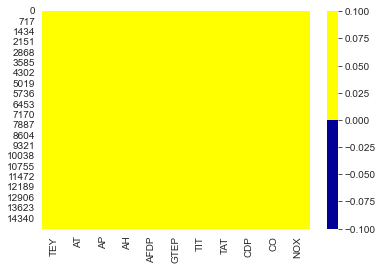

In [35]:
cols = gasturbine.columns
sns.heatmap(gasturbine[cols].isnull(),
            cmap=sns.color_palette(['#000099','#ffff00']))

In [13]:
X = gasturbine.iloc[:,1:]
Y = gasturbine.iloc[:,0]
Y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

In [14]:
X = StandardScaler().fit_transform(X)

In [15]:
X

array([[-1.4397781 , -0.82664395,  1.28143632, ..., -1.35733078,
         0.53201195,  1.3878449 ],
       [-1.44960109, -0.74864748,  1.30456402, ..., -1.36367619,
         0.56873344,  1.39300237],
       [-1.43472138, -0.68625031,  1.21908576, ..., -1.36095673,
         0.5529378 ,  1.36358566],
       ...,
       [-1.38626659, -1.07623263,  1.47697056, ..., -1.46792219,
         2.69592467,  2.17006209],
       [-1.42042259, -0.99823616,  1.44159024, ..., -1.42259784,
         1.9246834 ,  2.391165  ],
       [-1.43073409, -0.93583899,  1.33465179, ..., -1.37727349,
         1.35415028,  2.32153907]])

In [16]:
X.shape

(15039, 10)

In [17]:
from sklearn.preprocessing import StandardScaler
y = StandardScaler().fit_transform(Y.values.reshape(len(Y),1))[:,0]

In [18]:
y

array([-1.23117246, -1.22990897, -1.23054071, ..., -1.5160891 ,
       -1.48134317, -1.42827666])

In [20]:
def create_model():
    model = Sequential()
    model.add(Dense(12, kernel_initializer='uniform', activation='relu', input_dim=10))
    model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['mse'])
    return model

In [21]:
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0)
batch_size = [10,20,40]
epochs = [10,50,100]
param_grid = dict(batch_size = batch_size,epochs = epochs)
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(X,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END .......batch_size=10, epochs=10;, score=nan total time=  16.2s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END .......batch_size=10, epochs=10;, score=nan total time=  10.4s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END .......batch_size=10, epochs=10;, score=nan total time=  10.4s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END .......batch_size=10, epochs=10;, score=nan total time=   8.7s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END .......batch_size=10, epochs=10;, score=nan total time=   8.1s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END .......batch_size=10, epochs=50

In [22]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : nan, using {'batch_size': 10, 'epochs': 10}
nan,nan with: {'batch_size': 10, 'epochs': 10}
nan,nan with: {'batch_size': 10, 'epochs': 50}
nan,nan with: {'batch_size': 10, 'epochs': 100}
nan,nan with: {'batch_size': 20, 'epochs': 10}
nan,nan with: {'batch_size': 20, 'epochs': 50}
nan,nan with: {'batch_size': 20, 'epochs': 100}
nan,nan with: {'batch_size': 40, 'epochs': 10}
nan,nan with: {'batch_size': 40, 'epochs': 50}
nan,nan with: {'batch_size': 40, 'epochs': 100}


In [23]:
def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(8,input_dim = 10,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4,input_dim = 10,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['mse'])
    return model

# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 10)

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=nan total time=  10.1s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=nan total time=   8.6s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=nan total time=   9.0s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=nan total time=   8.8s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=nan total time=   9.1s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 1/5; 2/9] END d

In [24]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : nan, using {'dropout_rate': 0.0, 'learning_rate': 0.001}
nan,nan with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
nan,nan with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
nan,nan with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
nan,nan with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
nan,nan with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
nan,nan with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
nan,nan with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
nan,nan with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
nan,nan with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


In [25]:
def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(8,input_dim = 10,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.0))
    model.add(Dense(4,input_dim =10,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.0))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['mse'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 10)

activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

param_grids = dict(activation_function = activation_function,init = init)

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X,y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=nan total time=  10.4s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=nan total time=  10.5s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=nan total time=   9.7s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=nan total time=   9.1s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=nan total time=  10.0s
[CV 1/5; 2/12] START activation_function=softmax, init=normal.............

[CV 4/5; 10/12] END activation_function=linear, init=uniform;, score=nan total time=   9.0s
[CV 5/5; 10/12] START activation_function=linear, init=uniform..................
[CV 5/5; 10/12] END activation_function=linear, init=uniform;, score=nan total time=   8.7s
[CV 1/5; 11/12] START activation_function=linear, init=normal...................
[CV 1/5; 11/12] END activation_function=linear, init=normal;, score=nan total time=   9.1s
[CV 2/5; 11/12] START activation_function=linear, init=normal...................
[CV 2/5; 11/12] END activation_function=linear, init=normal;, score=nan total time=   8.9s
[CV 3/5; 11/12] START activation_function=linear, init=normal...................
[CV 3/5; 11/12] END activation_function=linear, init=normal;, score=nan total time=   9.1s
[CV 4/5; 11/12] START activation_function=linear, init=normal...................
[CV 4/5; 11/12] END activation_function=linear, init=normal;, score=nan total time=   8.7s
[CV 5/5; 11/12] START activation_function=linea

In [26]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : nan, using {'activation_function': 'softmax', 'init': 'uniform'}
nan,nan with: {'activation_function': 'softmax', 'init': 'uniform'}
nan,nan with: {'activation_function': 'softmax', 'init': 'normal'}
nan,nan with: {'activation_function': 'softmax', 'init': 'zero'}
nan,nan with: {'activation_function': 'relu', 'init': 'uniform'}
nan,nan with: {'activation_function': 'relu', 'init': 'normal'}
nan,nan with: {'activation_function': 'relu', 'init': 'zero'}
nan,nan with: {'activation_function': 'tanh', 'init': 'uniform'}
nan,nan with: {'activation_function': 'tanh', 'init': 'normal'}
nan,nan with: {'activation_function': 'tanh', 'init': 'zero'}
nan,nan with: {'activation_function': 'linear', 'init': 'uniform'}
nan,nan with: {'activation_function': 'linear', 'init': 'normal'}
nan,nan with: {'activation_function': 'linear', 'init': 'zero'}


In [27]:
def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 10,kernel_initializer = 'uniform',activation = 'linear'))
    model.add(Dropout(0.0))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'linear'))
    model.add(Dropout(0.0))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['mse'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 10)

neuron1 = [4,8,16]
neuron2 = [2,4,8]

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 1/5; 1/9] END ...........neuron1=4, neuron2=2;, score=nan total time=   9.9s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 2/5; 1/9] END ...........neuron1=4, neuron2=2;, score=nan total time=   9.6s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 3/5; 1/9] END ...........neuron1=4, neuron2=2;, score=nan total time=  11.0s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 4/5; 1/9] END ...........neuron1=4, neuron2=2;, score=nan total time=   9.3s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 5/5; 1/9] END ...........neuron1=4, neuron2=2;, score=nan total time=   9.3s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................
[CV 1/5; 2/9] END ...........neuron1=4, neuron2=4

In [28]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : nan, using {'neuron1': 4, 'neuron2': 2}
nan,nan with: {'neuron1': 4, 'neuron2': 2}
nan,nan with: {'neuron1': 4, 'neuron2': 4}
nan,nan with: {'neuron1': 4, 'neuron2': 8}
nan,nan with: {'neuron1': 8, 'neuron2': 2}
nan,nan with: {'neuron1': 8, 'neuron2': 4}
nan,nan with: {'neuron1': 8, 'neuron2': 8}
nan,nan with: {'neuron1': 16, 'neuron2': 2}
nan,nan with: {'neuron1': 16, 'neuron2': 4}
nan,nan with: {'neuron1': 16, 'neuron2': 8}


In [29]:
def create_model():
    model = Sequential()
    model.add(Dense(4,input_dim = 10,kernel_initializer = 'uniform',activation = 'linear'))
    model.add(Dropout(0.0))
    model.add(Dense(2,input_dim = 10,kernel_initializer = 'uniform',activation = 'linear'))
    model.add(Dropout(0.0))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['mse'])
    return model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 10)

model.fit(X,y)


y_predict = model.predict(X)
y_predict

470/470 [==============================] - 1s 640us/step


array([[-2.14909682],
       [-2.14909682],
       [-2.14909682],
       ...,
       [-2.14909682],
       [-2.14909682],
       [-2.14909682]])